In [1]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Data

In [2]:
data = pd.read_csv("C:/Users/andyr/OneDrive/Desktop/tweet-sentiment.csv", encoding='latin-1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
# Set Sample size

data = data.sample(frac=1)
data = data[:100000]

# Data Visualization

In [4]:
print("Dataset shape:", data.shape)

Dataset shape: (100000, 6)


1,599,999 rows and 6 columns

In [5]:
# Add column headers
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS
data.head()

,target,ids,date,flag,user,TweetText
572196,0,2209178713,Wed Jun 17 10:05:58 PDT 2009,NO_QUERY,plainlyphyra,"@dinug sucks right? unless I sleep in 5 mins,..."
735182,0,2264723450,Sun Jun 21 04:45:23 PDT 2009,NO_QUERY,desflavor667,Going for two in a row again. Getting busy wit...
482246,0,2179941357,Mon Jun 15 09:47:38 PDT 2009,NO_QUERY,autumnftw,I wish I lived in Chicago.
996752,4,1835941779,Mon May 18 07:03:42 PDT 2009,NO_QUERY,tamaryn,@visitor9627 ooof course you will.
1251369,4,1996496959,Mon Jun 01 15:11:00 PDT 2009,NO_QUERY,jackiewonders,@JL_DESIGNS thanks so much! seriously- when a...


In [6]:
data.describe()

,target,ids
count,100000.000000,1.000000e+05
mean,1.994720,1.998853e+09
std,2.000003,1.940039e+08
min,0.000000,1.467823e+09
25%,0.000000,1.956863e+09
50%,0.000000,2.002422e+09
75%,4.000000,2.177247e+09
max,4.000000,2.329203e+09


In [7]:
# Drop columns
data = data[["target","TweetText"]]
data.sample(5)

,target,TweetText
19008,0,"at home, listening to jeezy...got the munchies"
528036,0,really must stop looking at cupcake recipes on...
564081,0,@1capplegate That makes me SO sad! I love that...
864767,4,i love my new profile
240430,0,@lee_collins HaHa yeahh ur right... but i cants


In [8]:
data.target = data['target'].replace(4,1)

In [9]:
# check the number of positive vs. negative tagged sentences
positives = data['target'][data.target == 1 ]
negatives = data['target'][data.target == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         100000
No. of positve tagged sentences is:  49868
No. of negative tagged sentences is: 50132


In [10]:
# get a word count per of TweetText
def word_count(words):
    return len(words.split())

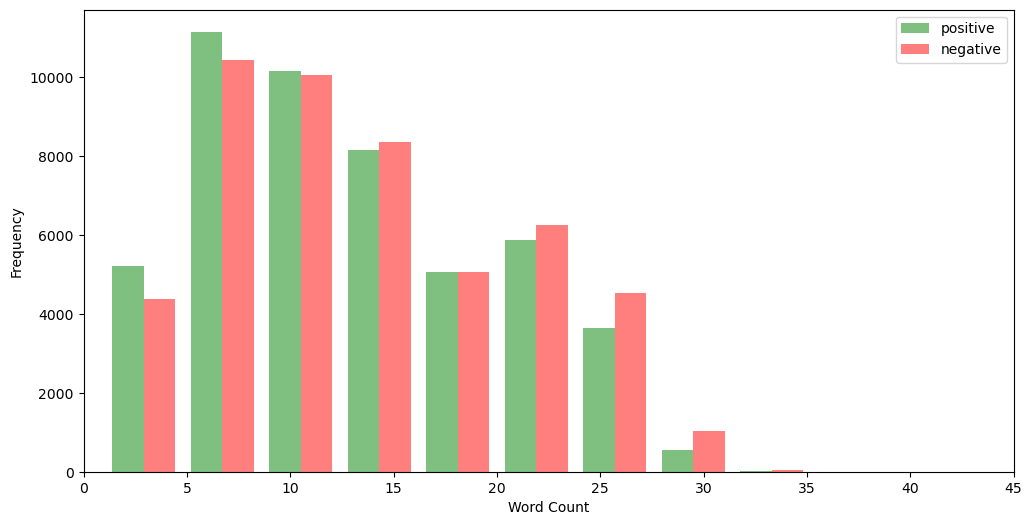

In [11]:
# plot word count distribution for both positive and negative 

data['word count'] = data['TweetText'].apply(word_count)
p = data['word count'][data.target == 1]
n = data['word count'][data.target == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [12]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['TweetText']):
    words = line.split()
    for word in words:
        if(len(word) > 2):
            all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 32544),
 ('and', 18352),
 ('you', 14749),
 ('for', 13422),
 ('have', 8838),
 ('that', 8070),
 ("i'm", 7965),
 ('just', 7831),
 ('but', 7706),
 ('with', 7040),
 ('not', 6505),
 ('was', 6406),
 ('this', 5622),
 ('get', 5034),
 ('good', 4921),
 ('like', 4771),
 ('are', 4738),
 ('all', 4478),
 ('out', 4333),
 ('your', 4030)]

# Data Cleaning

In [13]:
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andyr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andyr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Lower Casing: Each text is converted to lowercase.
# Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".
# Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")
# Removing Short Words: Words with length less than 2 are removed.
# Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
# Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

stop_words = set(stopwords.words('english'))

urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'


def preprocess_tweettext(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Removing all URls
    tweet = re.sub(urlPattern, '', tweet)
    # Removing all @username.
    tweet = re.sub(userPattern, '', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))
    # tokenizing words
    tokens = word_tokenize(tweet)
    # Remove stop words
    final_tokens = [w for w in tokens if w not in stop_words]
    # reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords = []
    for w in final_tokens:
        if len(w) > 1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    return ' '.join(finalwords)

# Analyzing Data

In [15]:
# Preprocess Data
data['preprocess_tweettext'] = data['TweetText'].apply(lambda x: preprocess_tweettext(x))
print('Preprocessing complete.')

Preprocessing complete.


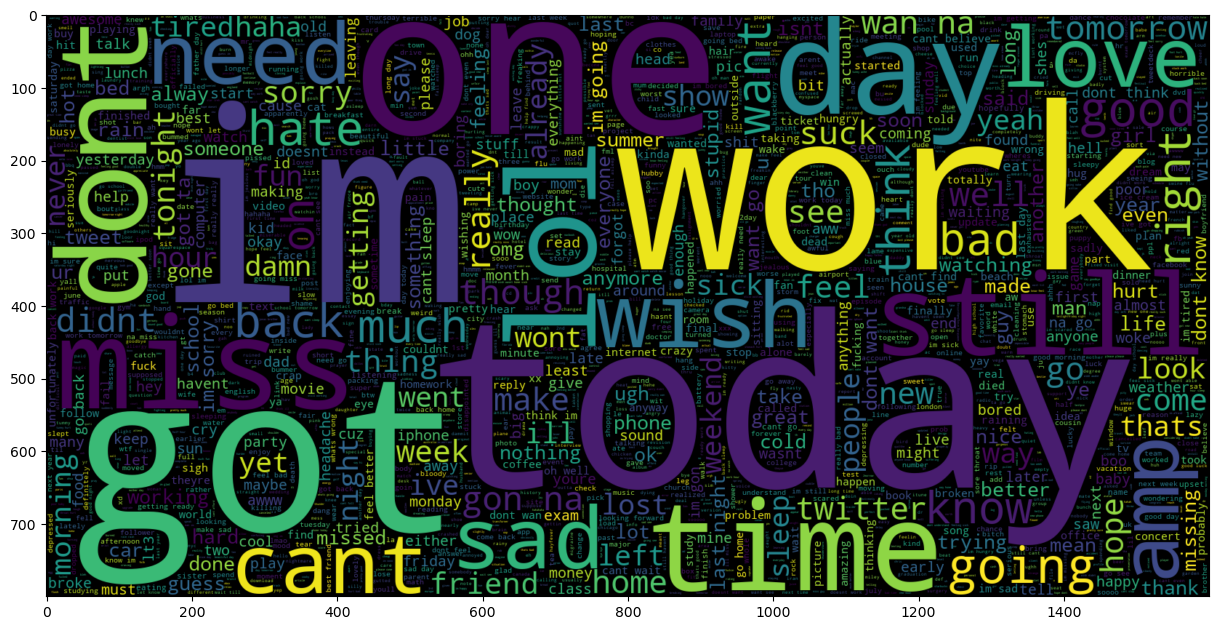

In [16]:
# Negative Tweets
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.target == 0].preprocess_tweettext))
plt.imshow(wc , interpolation = 'bilinear')

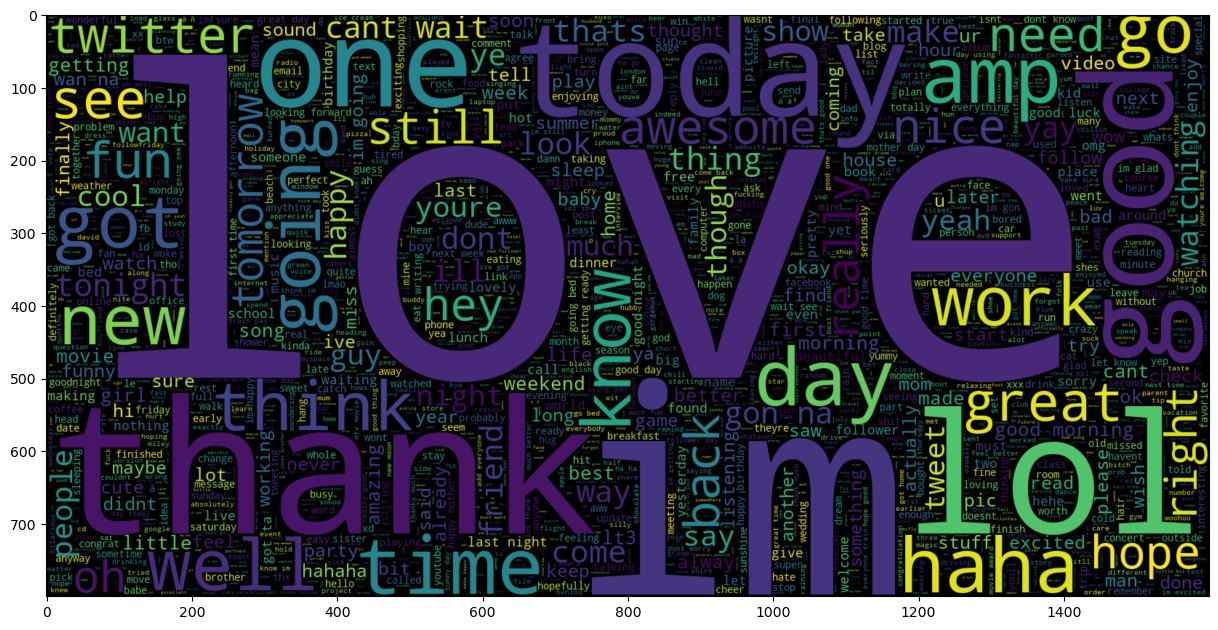

In [17]:
# Positive Tweets
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.target == 1].preprocess_tweettext))
plt.imshow(wc , interpolation = 'bilinear')

- Vectorization and Splitting the data 
- Storing input variable-processes_tweets to X and output variable-polarity to y

In [18]:
# Assign the preprocessed text and target values
X = data['preprocess_tweettext'].values.astype(str)
y = data['target'].values

Convert text to word frequency vectors
- TF-IDF
- This is an acronym than stands for Term Frequency – Inverse Document Frequency which are the components of the resulting scores assigned to each word.

The Preprocessed Data is divided into 2 sets of data:

- Training Data: The dataset upon which the model would be trained on. Contains 80% data.
- Test Data: The dataset upon which the model would be tested against. Contains 20% data

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(sublinear_tf=True)

# Convert the collection of raw documents to a matrix of TF-IDF features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print('Train set shape:', X_train_tfidf.shape)
print('Test set shape:', X_test_tfidf.shape)
print(f'Vector fitted.')
print('No. of feature words:', len(vectorizer.vocabulary_))


Train set shape: (80000, 54460)
Test set shape: (20000, 54460)
Vector fitted.
No. of feature words: 54460


# Model Building

Cannot build RNN because of memory limitations. Build model using Naive Bayes with MultinomialNB instead.

Accuracy: 0.74865
              precision    recall  f1-score   support

           0       0.73      0.79      0.76     10031
           1       0.77      0.71      0.74      9969

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000



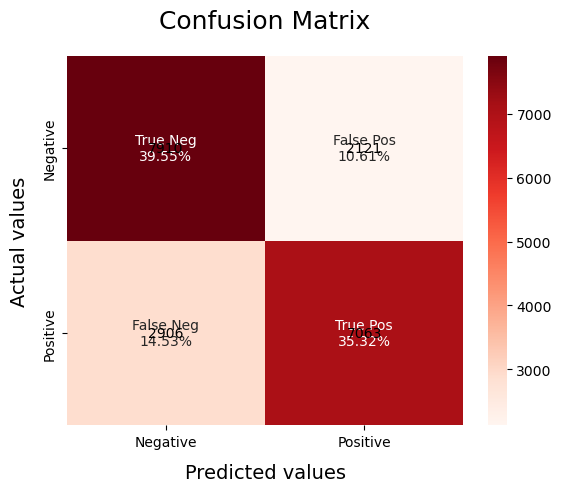

In [20]:
from sklearn.naive_bayes import MultinomialNB

# Create a MultinomialNB model
model = MultinomialNB()

# Train the model
model.fit(X_train_tfidf, y_train)

# Evaluate the model
accuracy = model.score(X_test_tfidf, y_test)
print('Accuracy:', accuracy)

# Predict values for the test dataset
y_pred = model.predict(X_test_tfidf)

# Print the evaluation metrics for the dataset
print(classification_report(y_test, y_pred))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

categories = ['Negative', 'Positive']
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cf_matrix, annot=labels, cmap='Reds', fmt='',
            xticklabels=categories, yticklabels=categories)

plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)

for i in range(len(categories)):
    for j in range(len(categories)):
        plt.text(j + 0.5, i + 0.5, cf_matrix[i, j], ha='center', va='center', color='black')

plt.show()


In [25]:
max_words = 2500
max_len = 100

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.preprocess_tweettext)
sequences = tokenizer.texts_to_sequences(data.preprocess_tweettext)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweets, data.target.values, test_size=0.2, random_state=101)

# Define the model architecture
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64, dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for saving the best model, early stopping, and TensorBoard
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', save_freq=1, save_weights_only=False)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
tensorboard_callback = TensorBoard(log_dir='./logs')

# Train the model without using batches and with TensorBoard visualization
history = model2.fit(X_train, y_train, batch_size=len(X_train), epochs=34, validation_data=(X_test, y_test), callbacks=[checkpoint2, early_stopping, reduce_lr, tensorboard_callback])


[[   0    0    0 ...  559 1440 1715]
 [   0    0    0 ...   70  277  155]
 [   0    0    0 ...   46 1376 1220]
 ...
 [   0    0    0 ...   29  761 1133]
 [   0    0    0 ...  108  314   56]
 [   0    0    0 ...    0  738   57]]
Epoch 1/34
1/1 [==============================] - 66s 66s/step - loss: 0.6931 - accuracy: 0.5025 - val_loss: 0.6929 - val_accuracy: 0.5038 - lr: 0.0010
Epoch 2/34
1/1 [==============================] - 51s 51s/step - loss: 0.6929 - accuracy: 0.5091 - val_loss: 0.6926 - val_accuracy: 0.5055 - lr: 0.0010
Epoch 3/34
1/1 [==============================] - 57s 57s/step - loss: 0.6925 - accuracy: 0.5121 - val_loss: 0.6921 - val_accuracy: 0.5123 - lr: 0.0010
Epoch 4/34
1/1 [==============================] - 53s 53s/step - loss: 0.6920 - accuracy: 0.5203 - val_loss: 0.6915 - val_accuracy: 0.5246 - lr: 0.0010
Epoch 5/34
1/1 [==============================] - 53s 53s/step - loss: 0.6914 - accuracy: 0.5332 - val_loss: 0.6908 - val_accuracy: 0.5420 - lr: 0.0010
Epoch 6/34
1

Send webpage recommendation with depression help pages to negative posts. 

In [ ]:
# Perform predictions on new data
new_data = [
    "https://www.example.com/page1",
    "https://www.example.com/page2",
    "https://www.example.com/page3"
]
sequences = tokenizer.texts_to_sequences(new_data)
new_tweets = pad_sequences(sequences, maxlen=max_len)
predictions = model.predict(new_tweets)

# Classify the predictions and send recommendations to positive category
negative_recommendations = []
for i in range(len(predictions)):
    if predictions[i] > 0.5:  # Adjust the threshold as needed
        negative_recommendations.append(new_data[i])

# Send the recommendations to the intended recipient
recipient_email = "recipient@example.com"  # Input recipient's email address
email_subject = "Webpage Recommendations"
email_body = "\n".join(negative_recommendations)  # Format recommendations as desired
